#### Jonathan Lynch

#### CSC 578/Section 901

#### Homework 4

## Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [6]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [7]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [9]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [10]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

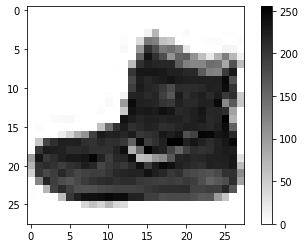

In [11]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

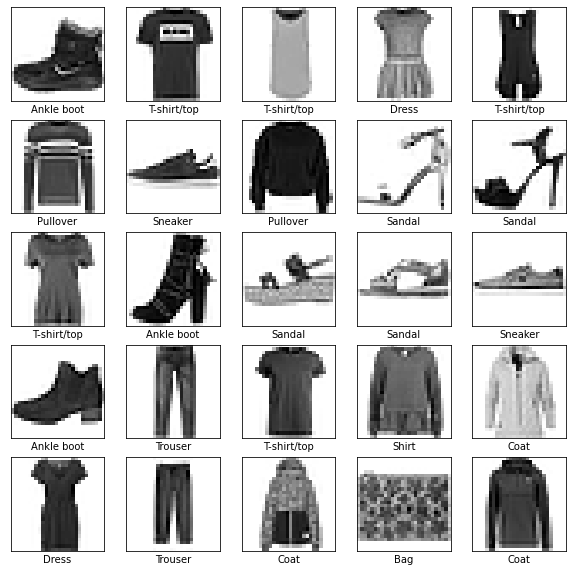

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6286 - accuracy: 0.7794
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3867 - accuracy: 0.8602
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3435 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3131 - accuracy: 0.8840
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2961 - accuracy: 0.8909: 0s - loss: 0
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2837 - accuracy: 0.8969: 0s - loss: 0.2839 - accura
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2681 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2519 - accuracy: 0.9064
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2484 - accuracy: 0.9071
Epoch 10/10
1875/1875 [=================

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3395 - accuracy: 0.8809

Test accuracy: 0.8809000253677368


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [20]:
predictions[0]

array([1.1307653e-04, 3.8377856e-10, 5.7167959e-08, 2.5151047e-07,
       1.2927526e-07, 1.4318389e-04, 4.8746419e-06, 2.5305996e-02,
       1.1859238e-06, 9.7443128e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [21]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [22]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

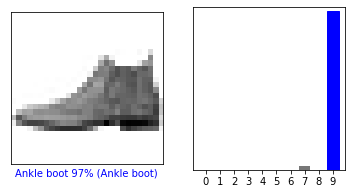

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

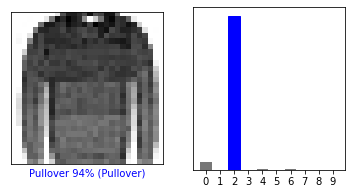

In [25]:
i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

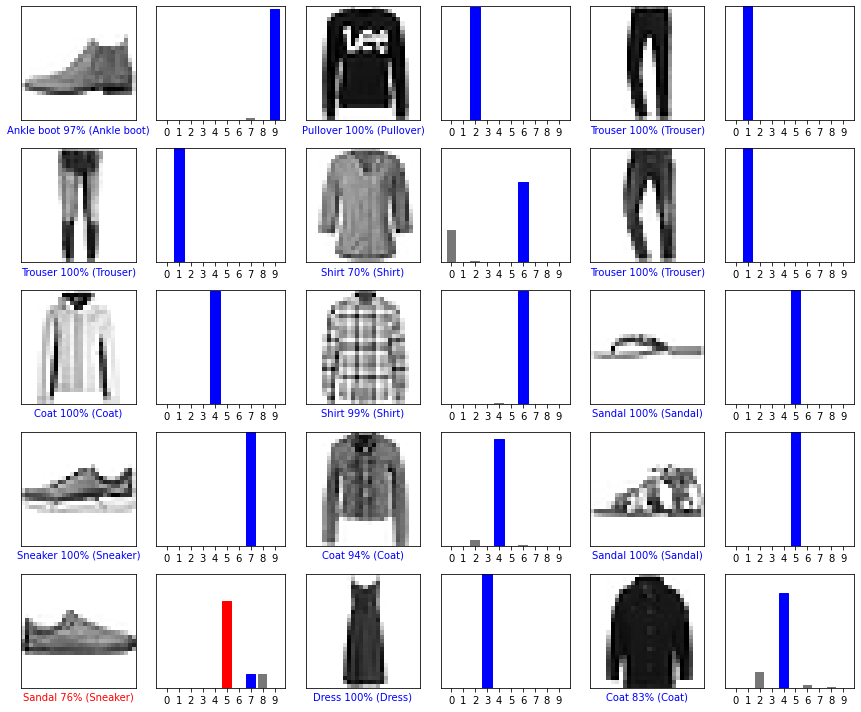

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.9673638e-05 4.8862944e-18 9.9626333e-01 3.1337267e-13 3.4135361e-03
  6.0464101e-13 2.9342072e-04 1.2771468e-13 2.7498536e-11 7.9136357e-14]]


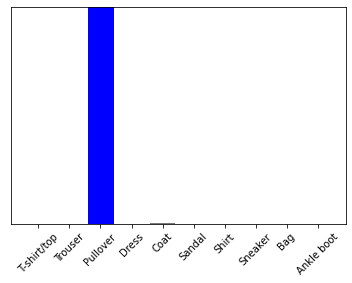

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [31]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.

## Homework 4: Experiment with four different parameters to increase model performance

### Number of hidden layers

__Add an additional dense hidden layer (with 128 neurons and relu activation function) after the first layer which transforms format of the images into a one-dimensional array:__

In [32]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10))

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6215 - accuracy: 0.7796
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3744 - accuracy: 0.8620
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3290 - accuracy: 0.8803: 0s - l
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3098 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2931 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2805 - accuracy: 0.8932
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2635 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2513 - accuracy: 0.9055
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2373 - accuracy: 0.9115
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - los

In [35]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3330 - accuracy: 0.8856

Test accuracy: 0.8855999708175659


This result (test accuracy) is slightly better than the original network model.

__Add additional dense hidden layer (with 128 neurons and relu activation function) to the model:__

In [36]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10))

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6236 - accuracy: 0.7784
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3783 - accuracy: 0.8579
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3349 - accuracy: 0.8745
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3052 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2877 - accuracy: 0.8948
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2790 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2614 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2489 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2404 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.232

In [39]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3333 - accuracy: 0.8793

Test accuracy: 0.8792999982833862


This result (test accuracy) is slightly worse than the previous model with less hidden layers.

__Add a fourth hidden layer (with 128 neurons and relu activation function) to the network:__

In [69]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10))

In [70]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [71]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6549 - accuracy: 0.7616
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3747 - accuracy: 0.8625
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3364 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3173 - accuracy: 0.8814
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2942 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2770 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2680 - accuracy: 0.8980
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2522 - accuracy: 0.9059
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2514 - accuracy: 0.9048
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.242

In [72]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3680 - accuracy: 0.8718

Test accuracy: 0.8718000054359436


This result (test accuracy) is also slightly worse than the previous trial.  Since it appears that the test accuracy seems to be decreasing with the addition of hidden network layers, the first model (with only two hidden layers) will be carried forward to experiment with the number of nodes/neurons.

### Number of nodes in hidden layers

__Change the number of neurons in the first hidden layer to 256 nodes:__

In [110]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10))

In [111]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [112]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5979 - accuracy: 0.7857
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3656 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3169 - accuracy: 0.8824
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3055 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2818 - accuracy: 0.8960
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2645 - accuracy: 0.9005
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2531 - accuracy: 0.9061
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2418 - accuracy: 0.9076
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2336 - accuracy: 0.9109
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.221

In [113]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3251 - accuracy: 0.8865

Test accuracy: 0.8865000009536743


This result (test accuracy) is slightly improved compared to the original model.

__Change the number of neurons in the last hidden layer to 784 (leaving the number of neurons in the first hidden layer at 256):__

In [142]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(784, activation = 'relu'))
model.add(tf.keras.layers.Dense(10))

In [143]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [144]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5822 - accuracy: 0.7905
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3623 - accuracy: 0.8663
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3261 - accuracy: 0.8807
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2965 - accuracy: 0.8900
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2838 - accuracy: 0.8943
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2649 - accuracy: 0.9006
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2470 - accuracy: 0.9054
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2346 - accuracy: 0.9119
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2252 - accuracy: 0.9157
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.216

In [145]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3496 - accuracy: 0.8818

Test accuracy: 0.8817999958992004


This result (test accuracy) is worse than the previous model.

__Change the number of neurons in both hidden layers to 512:__

In [138]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(512, activation = 'relu'))
model.add(tf.keras.layers.Dense(512, activation = 'relu'))
model.add(tf.keras.layers.Dense(10))

In [139]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [140]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5921 - accuracy: 0.7870
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3594 - accuracy: 0.8678
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3200 - accuracy: 0.8819
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2995 - accuracy: 0.8875
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2782 - accuracy: 0.8978
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2586 - accuracy: 0.9033
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2495 - accuracy: 0.9045
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2372 - accuracy: 0.9094
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2252 - accuracy: 0.9141
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.217

In [141]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3542 - accuracy: 0.8832

Test accuracy: 0.8831999897956848


Although this result (test accuracy) is better than the previous trial, the model with 256 neurons and 128 neurons in the first and second hidden layers, respectively, appears to be the best.  Therefore, this model will be carried forward to the following experiment with dropout layers.

### Dropout

__Apply dropout layer after first hidden layer, to help prevent overfitting:__

In [77]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10))

In [78]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [79]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6509 - accuracy: 0.7693
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4017 - accuracy: 0.8517
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3578 - accuracy: 0.8698
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3418 - accuracy: 0.8734
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3208 - accuracy: 0.8785
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3057 - accuracy: 0.8862
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2932 - accuracy: 0.8913
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2864 - accuracy: 0.8918
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2791 - accuracy: 0.8951
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.268

In [80]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3329 - accuracy: 0.8836

Test accuracy: 0.8835999965667725


The result (test accuracy) is slightly worse. This dropout layer does not appear to be improving the results.

__Apply dropout layers after the first and second hidden layers:__

In [81]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))

In [82]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [83]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6746 - accuracy: 0.7591
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4121 - accuracy: 0.8495
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3727 - accuracy: 0.8613
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3482 - accuracy: 0.8721
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3292 - accuracy: 0.8781
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3231 - accuracy: 0.8800
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3038 - accuracy: 0.8867
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2973 - accuracy: 0.8883
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2987 - accuracy: 0.8877
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.280

In [84]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3326 - accuracy: 0.8792

Test accuracy: 0.8791999816894531


This result (test accuracy) is slightly worse than the previous result. The two dropout layers do not appear to be improving the results.

__Apply dropout layer after the input layer, the first hidden layer, and the second hidden layer:__

In [85]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))

In [86]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [87]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7356 - accuracy: 0.7359
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4488 - accuracy: 0.8342
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4106 - accuracy: 0.8475
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3871 - accuracy: 0.8575
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3754 - accuracy: 0.8612
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3579 - accuracy: 0.8681
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3498 - accuracy: 0.8686
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3479 - accuracy: 0.8705
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3419 - accuracy: 0.8727
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.332

In [88]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3541 - accuracy: 0.8686

Test accuracy: 0.8686000108718872


This result (test accuracy) is worse than the two prior trials.  It appears that the test accuracy seems to be decreasing with the addition of dropout layers.  Therefore, the model with no dropout layers will be carried forward to the next experiment with activation functions.

### Activation functions for hidden layers

__Change the activation function for hidden layers to sigmoid function:__

In [114]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(256, activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(128, activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(10))

In [115]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [116]:
history1 = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7883 - accuracy: 0.7358
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3892 - accuracy: 0.8598
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3487 - accuracy: 0.8716
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3165 - accuracy: 0.8839
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3018 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2807 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2622 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2549 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2434 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.225

In [117]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3265 - accuracy: 0.8826

Test accuracy: 0.8826000094413757


The result (test accuracy) is nearly the same as the result obtained using rectified linear unit.

__Change the activation function for hidden layers to tanh function:__

In [118]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(256, activation = 'tanh'))
model.add(tf.keras.layers.Dense(128, activation = 'tanh'))
model.add(tf.keras.layers.Dense(10))

In [119]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [120]:
history2 = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5700 - accuracy: 0.7901
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3650 - accuracy: 0.8682
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3280 - accuracy: 0.8782: 0s - loss: 0.3275 - 
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3082 - accuracy: 0.8880
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3015 - accuracy: 0.8861
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2857 - accuracy: 0.8917
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2706 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2545 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2554 - accuracy: 0.9044
Epoch 10/10
1875/1875 [==============================] - 4s 

In [121]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3313 - accuracy: 0.8815

Test accuracy: 0.8815000057220459


The result (test accuracy) using the tanh activation function for hidden layers is not as good as the results obtained using the rectified linear unit or sigmoid functions for hidden layers.

__Change the activation function for hidden layers to softmax:__

In [125]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(256, activation = 'softmax'))
model.add(tf.keras.layers.Dense(128, activation = 'softmax'))
model.add(tf.keras.layers.Dense(10))

In [126]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [127]:
history3 = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0854 - accuracy: 0.4449: 0s - loss: 2.1143 - accu
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9228 - accuracy: 0.6707
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7561 - accuracy: 0.6967
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6735 - accuracy: 0.7301
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6166 - accuracy: 0.7488
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5863 - accuracy: 0.7604
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5414 - accuracy: 0.7924
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5078 - accuracy: 0.8093
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4755 - accuracy: 0.8343
Epoch 10/10
1875/1875 [==============================] -

In [128]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4824 - accuracy: 0.8357

Test accuracy: 0.8356999754905701


The result (test accuracy) using softmax activation for hidden layers is the worst.  It is not as good as the results obtained using the rectified linear unit, sigmoid, or tanh functions for hidden layers.

### Plot results of training accuracies over 10 epochs for four different activation functions:

In [146]:
relu_dict = history.history
sigmoid_dict = history1.history
tanh_dict = history2.history
softmax_dict = history3.history

In [147]:
relu_acc = relu_dict['accuracy']
sigmoid_acc = sigmoid_dict['accuracy']
tanh_acc = tanh_dict['accuracy']
softmax_acc = softmax_dict['accuracy']

In [148]:
epochs = range(1, len(relu_acc) + 1)

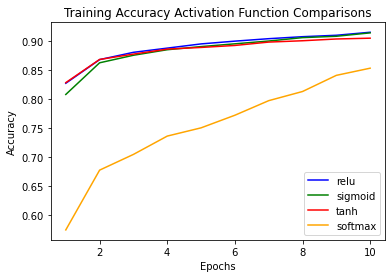

In [149]:
plt.plot(epochs, relu_acc, 'b', label='relu')
plt.plot(epochs, sigmoid_acc, 'g', label='sigmoid')
plt.plot(epochs, tanh_acc, 'r', label='tanh')
plt.plot(epochs, softmax_acc, 'orange', label='softmax')
plt.title('Training Accuracy Activation Function Comparisons')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

Although this graph is tracking the training accuracy, and not test accuracy, it is still very useful in terms of gleaning insights from the performance of the four different activation functions examined.  It shows that softmax activation in the two hidden layers performed considerably worst in terms of training accuracy compared to the other three activation functions.  For this dataset, I would probably select either the rectified linear unit or sigmoid activation functions to use, as their performance was the best, and very comparable to one another. 